# Assignment 1

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y


---
### Step 1: Data ingestion

Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

### <span style="color:chocolate">Exercise 1:</span> Create data (10 points)

Create artificial data using the function <span style="color:chocolate">create_1d_data()</span> defined at the top of this notebook. Set the following argument values:
- number of examples = 70;
- slope (w) = 2;
- intercept (b) = 1;
- bound = 1.

Denote the output by X and Y. Print the shape and the first 10 elements for each object.

In [3]:
# YOUR CODE HERE

# Create the (X, Y) tuple using the function given 
X, Y = create_1d_data(
    num_examples=70,
    w=2,
    b=1,
    bound=1
)

# Print out X
print("First 10 elements of X\n", X[:10])
print("Shape of X", X.shape)

print(50*"*")

# Print out Y
print("First 10 elements of Y\n", Y[:10])
print("Shape of Y", Y.shape)

First 10 elements of X
 [0 1 2 3 4 5 6 7 8 9]
Shape of X (70,)
**************************************************
First 10 elements of Y
 [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]
Shape of Y (70,)


---
### Step 2: Data preprocessing

Given the simplicity of the data (just one feature in X), our sole task here is to divide the data into training and test sets.

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.3 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [4]:
# YOUR CODE HERE

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.3,
    random_state=1234
)

# Print out shapes
print("Shape of X_train:", X_train.shape)
print(50*"*")

print("Shape of X_test:", X_test.shape)
print(50*"*")

print("Shape of Y_train:", Y_train.shape)
print(50*"*")

print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (49,)
**************************************************
Shape of X_test: (21,)
**************************************************
Shape of Y_train: (49,)
**************************************************
Shape of Y_test: (21,)


---
### Step 3: Exploratory data analysis (EDA)

EDA helps us to gain insights into the distribution and characteristics of the dataset we are dealing with. 
This understanding is fundamental for making informed decisions regarding:
- data cleaning;
- feature selection;
- model building;
- model evaluation, etc.

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

1. Generate a scatter plot displaying the X_train data along the x-axis and the Y_train data along the y-axis, ensuring clear labeling of both axes. Add a title "Exploratory Data Analysis: Training Data" and a legend "observed training data" to the plot;
2. Enhance the plot by incorporating a vertical red line to denote the mean value of X_train. Accompany it with a legend clarifying the meaning of the line and the mean value of X_train.

mean of X_train: 34.61224489795919


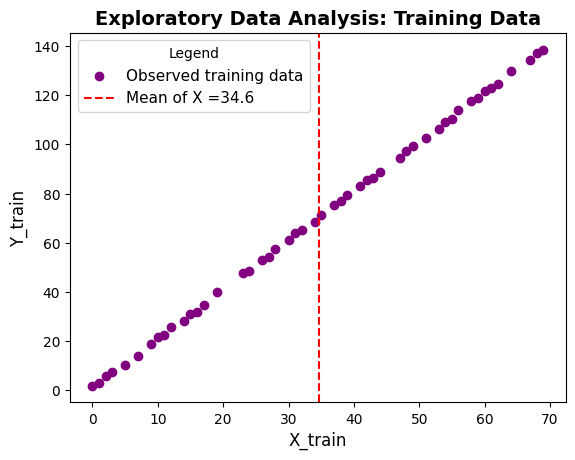

In [5]:
# YOUR CODE HERE

X_mean = np.mean(X_train)
print("mean of X_train:", X_mean)

fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, 
           color='purple',
           label="Observed training data")

ax.axvline(x=X_mean, color='red', linestyle='--', label=f'Mean of X ={X_mean:.1f}')

ax.set_title('Exploratory Data Analysis: Training Data', 
             fontsize=14,
             fontweight='bold')
ax.set_xlabel('X_train', fontsize=12)
ax.set_ylabel('Y_train', fontsize=12, rotation=90)
ax.legend(title="Legend", 
          loc="upper left",
          fontsize=11)
#plt.scatter(X_train, Y_train)

---
### Step 4: Modeling

In this section, our objective is to propose models to describe the data generation process. Remember a model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Models for data (10 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_train. These predictions should be vectors of the same shape as Y_train. Call these predictions M1_hat_train and M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
2. Plot the prediction lines of these two models overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend. 

Text(0, 0.5, 'Observed/Predicted Output')

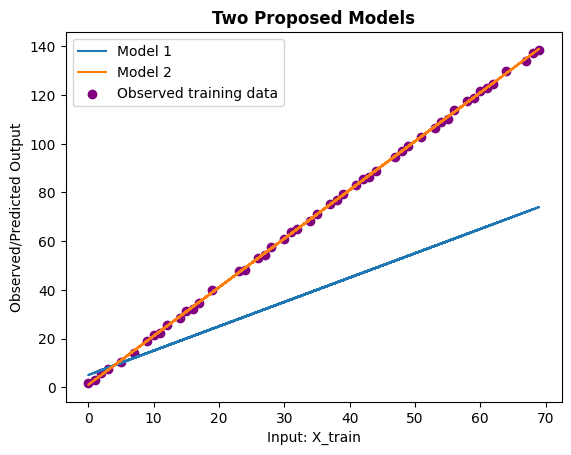

In [6]:
# YOUR CODE HERE

#
def M1(feature):
    """ 
    Reture predicted value as an nd numpy array from model 1
    Arg: a (n,) numpy array
    """
    return 5 + feature

def M2(feature):
    """ 
    Reture predicted value as an nd numpy array from model 2
    Arg: a (n,) numpy array
    """
    return 1 + 2 * feature


# M1_hat_train = 5 + 1 * X_train
M1_hat_train = M1(X_train)
#
# M2_hat_train = 1 + 2 * X_train
M2_hat_train = M2(X_train)

fig, ax = plt.subplots()
ax.plot(X_train, M1_hat_train,
        label="Model 1")
ax.plot(X_train, M2_hat_train,
        label="Model 2")
ax.scatter(X_train, Y_train, 
           color='purple',
           label='Observed training data')

ax.legend(loc="upper left")

ax.set_title("Two Proposed Models",
             fontweight="bold")
ax.set_xlabel("Input: X_train")
ax.set_ylabel("Observed/Predicted Output")

---
### Step 5: Evaluation and Generalization

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{n} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

How well do our models generalize? The test dataset serves as a proxy for unseen data in real-world applications. By evaluating the model on the test data, you can assess its ability to generalize beyond the training data. This ensures that the model can make accurate predictions on new data it hasn't seen during training.

### <span style="color:chocolate">Exercise 5:</span> Computing MSE (20 points)

1. Write a function for computing the MSE metric based on the provided definition;
2. Utilizing this function, calculate the training data MSE for the two models, $M_1$ and $M_2$.
3. Comment on which model fits the training data better.

In [7]:
type(Y_train)
M1_hat_train.shape

a = np.array([1, 3])

b = np.array([4, 5])

print((b - a))
(np.square(b - a).sum()) / len(b)


[3 2]


np.float64(6.5)

In [8]:
# YOUR CODE HERE
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values.
  true_values: a n by 1 nd numpy array
  predicted_values: a n by 1 nd numpy array
  """
  return (np.square(predicted_values - true_values).sum()) / len(true_values)
MSE(Y_train, M1_hat_train)

np.float64(1358.2515152570322)

In [9]:
# YOUR CODE HERE

# MSE for M1
M1_MSE = MSE(true_values=Y_train, predicted_values=M1_hat_train)
print("MSE for model 1: {:.2f}".format(M1_MSE))
# MSE for M2
M2_MSE = MSE(true_values=Y_train, predicted_values=M2_hat_train)
print("MSE for model 2: {:.2f}".format(M2_MSE))

# Please see the markdown cell below for comment

MSE for model 1: 1358.25
MSE for model 2: 0.31


### Exercise 5 comment
Model 2's mean squared error is significantly smaller than that of Model 1's, as shown in the above print outs. 

Base on MSE from the training data, I'd choose Model 2 **M2**.

### <span style="color:chocolate">Exercise 6:</span> Generalization (15 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_test. These predictions should be vectors of the same shape as Y_test. Call these predictions M1_hat_test and M2_hat_test.
2. Calculate the test data MSE for the two models, $M_1$ and $M_2$, using the <span style="color:chocolate">MSE()</span> function defined above.
3. Does the model you chose in Exercise 5 generalize well?

In [10]:
# YOUR CODE HERE

# Compute M1 predicted values using X_test
M1_hat_test = M1(X_test)
M1_hat_test.shape

# Compute M2 predicted values using X_test
M2_hat_test = M2(X_test)
M2_hat_test

# Compute MSE
# M1 MSE
M1_MSE_test = MSE(Y_test, M1_hat_test)
print(f"M1 MSE using test data:\n{M1_MSE_test:.2f}")
# M2 MSE
M2_MSE_test = MSE(Y_test, M2_hat_test)
print(f"M2 MSE using test data:\n{M2_MSE_test:.2f}")

# Please see the markdown cell below for comment

M1 MSE using test data:
1300.10
M2 MSE using test data:
0.34


### Exercise 6 Comment

From Exercise 5 I chose **M2** because its (much) smaller MSE. **M2** **generalizes very well** in testing data as **M2** again has much smaller MSE compared with the alternative. 

For the chosen M2, The test MSE (0.34) is only moderately bigger than training MSE (0.31)

### <span style="color:chocolate">Exercise 7:</span> More features (25 points)

1. Fit an 8-th degree polynomial to (X_train, Y_train). Call the predictions of this model M3_hat_train. Hint: see <span style="color:chocolate">np.polyfit()</span> for details.
2. Plot the prediction lines of the $M_3$ overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend. 
3. Calculate the training data MSE for the $M_3$ model using the <span style="color:chocolate">MSE()</span> function defined above.
4. Does model $M_3$ do better than your chosen model in Exercise 5 at predicting the labels for new unseen data? Hint: your new unseen data is the test dataset.

**************************************************
The fitted coefficients for 8th degree polynomial:
[ 3.21841468e-12 -9.45992842e-10  1.13710297e-07 -7.26116579e-06
  2.68776996e-04 -5.91740558e-03  7.55359163e-02  1.51185277e+00
  1.98163691e+00]
**************************************************


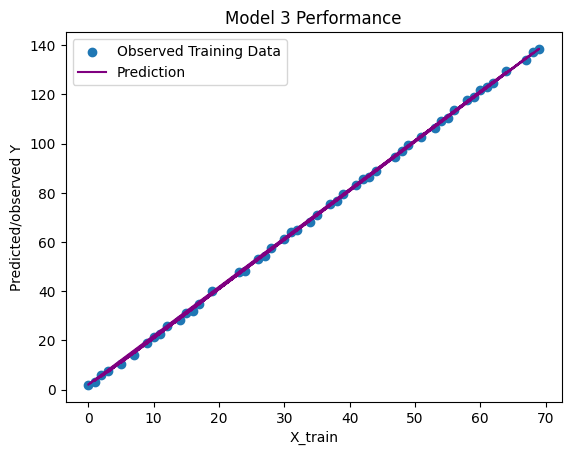

**************************************************
Training data MSE: 0.27
**************************************************
For M3:
The training MSE is 0.27
The test MSE is 0.40
Please see comment in the markdown cell below.


In [12]:
# YOUR CODE HERE

# Task 1
# Fit 8th polynomial
coefficients = np.polyfit(X_train, Y_train, deg=8)
print(50*"*")
print(f"The fitted coefficients for 8th degree polynomial:\n{coefficients}")
poly_function = np.poly1d(coefficients)
poly_function(X_train)

# Define a funciton to compute M3 prediction from input
def M3(feature):
    poly_function = np.poly1d(coefficients)
    return poly_function(feature)

M3_hat_train = M3(X_train)


# Task 2: Plot
fig, ax = plt.subplots()

ax.scatter(X_train, Y_train,
           label="Observed Training Data")
ax.plot(X_train, M3_hat_train,
        color="purple",
        label="Prediction")

ax.set_title("Model 3 Performance")
ax.set_xlabel("X_train")
ax.set_ylabel("Predicted/observed Y")
ax.legend(loc="upper left")
print(50*"*")
plt.show()

# Task 3: MSE for training data
MSE_M3_train = MSE(true_values=Y_train, predicted_values=M3_hat_train)
print(50*"*")
print(f"Training data MSE: {MSE_M3_train:.2f}")

# Compute MSE for unseen (test) data
M3_hat_test = M3(X_test)
MSE_M3_test = MSE(true_values=Y_test, predicted_values=M3_hat_test)

# Print out
print(50*"*")
print("For M3:")
print(f"The training MSE is {MSE_M3_train:.2f}")
print(f"The test MSE is {MSE_M3_test:.2f}")
print("Please see comment in the markdown cell below.")


### Exercise 7 comment

- With **training data**, M3 (MSE 0.27) performs better than M2 (MSE 0.31).
- However, **M3 overfits** the data. With **unseen** (test) data, MSE of M3 (0.4) deteriorates a great deal. 
- This indicates that **M3 does not generalize as well as M2**. 

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

Would you perform EDA on the test dataset?
1. Why or why not?
2. Provide a link to a paper/article to support your answer.

# YOUR ANSWER HERE

1. No. EDA on test data defeats the purpose of train-test split and could also potentially lead the practioner toward overfitting.
2. Link: https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf
